In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier   
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
pd.pandas.set_option('display.max_columns', None)

In [5]:
import os
os.getcwd()

'/content'

In [6]:
#df = pd.read_csv("/content/gdrive/MyDrive/upGrad/telecom_churn_data.csv")
df = pd.read_csv("telecom_churn_data.csv")

In [7]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [8]:
df.shape

(99999, 226)

In [9]:
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [10]:
df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [11]:
columns_null = df.columns[(df.isnull().sum())>0]
d={}
for col in columns_null:
  d[col] = df[col].isnull().sum()

In [12]:
#storing the null columns in a saparate dictionary.
for k,v in d.items():
  print(k," ",v)

loc_og_t2o_mou   1018
std_og_t2o_mou   1018
loc_ic_t2o_mou   1018
last_date_of_month_7   601
last_date_of_month_8   1100
last_date_of_month_9   1659
onnet_mou_6   3937
onnet_mou_7   3859
onnet_mou_8   5378
onnet_mou_9   7745
offnet_mou_6   3937
offnet_mou_7   3859
offnet_mou_8   5378
offnet_mou_9   7745
roam_ic_mou_6   3937
roam_ic_mou_7   3859
roam_ic_mou_8   5378
roam_ic_mou_9   7745
roam_og_mou_6   3937
roam_og_mou_7   3859
roam_og_mou_8   5378
roam_og_mou_9   7745
loc_og_t2t_mou_6   3937
loc_og_t2t_mou_7   3859
loc_og_t2t_mou_8   5378
loc_og_t2t_mou_9   7745
loc_og_t2m_mou_6   3937
loc_og_t2m_mou_7   3859
loc_og_t2m_mou_8   5378
loc_og_t2m_mou_9   7745
loc_og_t2f_mou_6   3937
loc_og_t2f_mou_7   3859
loc_og_t2f_mou_8   5378
loc_og_t2f_mou_9   7745
loc_og_t2c_mou_6   3937
loc_og_t2c_mou_7   3859
loc_og_t2c_mou_8   5378
loc_og_t2c_mou_9   7745
loc_og_mou_6   3937
loc_og_mou_7   3859
loc_og_mou_8   5378
loc_og_mou_9   7745
std_og_t2t_mou_6   3937
std_og_t2t_mou_7   3859
std_og_t2t_mou_

In [13]:
### RECHARGE COLUMNS LIST
rech_columns = df.columns[(df.columns.str.contains('rech_amt|rech_data'))]
print(rech_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [14]:
null_rech_columns = set(rech_columns).intersection(set(columns_null))

In [15]:
### RECHARGE COLUMNS WITH NULL VALUES
null_rech_columns

{'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9'}

In [16]:
## ANALYZING TOTAL NO. OF DATA RECHARGES OVER MONTHS
lst_data_recharges_months = [df['total_rech_data_6'].sum(), df['total_rech_data_7'].sum(), df['total_rech_data_8'].sum(), df['total_rech_data_9'].sum()]
lst_data_recharges_months

[61972.0, 68183.0, 69851.0, 63280.0]

In [17]:
## ANALYZING TOTAL RECHARGE AMOUNT OVER MONTHS
lst_rech_amt_sum = [df['total_rech_amt_6'].sum(), df['total_rech_amt_7'].sum(), df['total_rech_amt_8'].sum(), df['total_rech_amt_9'].sum() ]
lst_rech_amt_sum

[32751134, 32295974, 32415388, 30334264]

In [18]:
df['total_rech_data_6']

0        1.0
1        NaN
2        NaN
3        NaN
4        1.0
        ... 
99994    NaN
99995    NaN
99996    2.0
99997    3.0
99998    1.0
Name: total_rech_data_6, Length: 99999, dtype: float64

In [19]:
df['av_rech_amt_data_6']
### NULL VALUES REPRESENT NO RECHARGE FOR DATA

0        252.0
1          NaN
2          NaN
3          NaN
4         56.0
         ...  
99994      NaN
99995      NaN
99996     39.0
99997    583.0
99998    154.0
Name: av_rech_amt_data_6, Length: 99999, dtype: float64

In [20]:
df['total_rech_data_6'] = df['total_rech_data_6'].fillna(0, inplace = False)
df['total_rech_data_7'] = df['total_rech_data_7'].fillna(0, inplace = False)
df['total_rech_data_8'] = df['total_rech_data_8'].fillna(0, inplace = False)

In [21]:
df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].fillna(0, inplace = False)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].fillna(0, inplace = False)
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].fillna(0, inplace = False)

In [22]:
### DERIVING NEW COLUMN
df['total_rech_amt_data_6'] = df['total_rech_data_6']*df['av_rech_amt_data_6']
df['total_rech_amt_data_7'] = df['total_rech_data_7']*df['av_rech_amt_data_7']
df['total_rech_amt_data_8'] = df['total_rech_data_8']*df['av_rech_amt_data_8']

In [23]:
df['total_rech_amt_data_6']

0         252.0
1           0.0
2           0.0
3           0.0
4          56.0
          ...  
99994       0.0
99995       0.0
99996      78.0
99997    1749.0
99998     154.0
Name: total_rech_amt_data_6, Length: 99999, dtype: float64

In [24]:
df['total_rech_amt_6']

0        362
1         74
2        168
3        230
4        196
        ... 
99994     60
99995    110
99996    119
99997    381
99998    710
Name: total_rech_amt_6, Length: 99999, dtype: int64

In [25]:
df['total_avg_rchg_amount_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_data_6']+ df['total_rech_amt_7'] + df['total_rech_amt_data_7'] )/2

In [26]:
### DEFINING HIGH VALUE CUSTOMERS CRITERIA
filter_amount = df['total_avg_rchg_amount_6_7'].quantile(0.7)
filter_amount

478.0

In [27]:
df_high_value = df[df['total_avg_rchg_amount_6_7']>filter_amount]
df_high_value.shape

(29953, 230)

In [28]:
nunique = df_high_value.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index

In [29]:
cols_to_drop

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [30]:
for col in cols_to_drop:
  print(df_high_value[col].value_counts())

109    29953
Name: circle_id, dtype: int64
0.0    29730
Name: loc_og_t2o_mou, dtype: int64
0.0    29730
Name: std_og_t2o_mou, dtype: int64
0.0    29730
Name: loc_ic_t2o_mou, dtype: int64
6/30/2014    29953
Name: last_date_of_month_6, dtype: int64
7/31/2014    29926
Name: last_date_of_month_7, dtype: int64
8/31/2014    29788
Name: last_date_of_month_8, dtype: int64
9/30/2014    29588
Name: last_date_of_month_9, dtype: int64
0.0    29411
Name: std_og_t2c_mou_6, dtype: int64
0.0    29417
Name: std_og_t2c_mou_7, dtype: int64
0.0    28781
Name: std_og_t2c_mou_8, dtype: int64
0.0    28055
Name: std_og_t2c_mou_9, dtype: int64
0.0    29411
Name: std_ic_t2o_mou_6, dtype: int64
0.0    29417
Name: std_ic_t2o_mou_7, dtype: int64
0.0    28781
Name: std_ic_t2o_mou_8, dtype: int64
0.0    28055
Name: std_ic_t2o_mou_9, dtype: int64


In [31]:
### REMOVING COLUMNS WITH 1 UNIQUE VALUE
for col in cols_to_drop:
    df_high_value = df_high_value.drop(col, axis = 1)

In [32]:
df_high_value.shape

(29953, 214)

In [33]:
### CHECKING ATTRIBUTES OF MONTH 9 TO FIND CHURN CUSTOMERS
attr = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

In [34]:
for col in attr:
    print(df_high_value[col].isnull().sum())

0
0
0
0


In [35]:
df_high_value['churn'] = 0

In [36]:
### WHEREVER THESE VALUES ARE 0 WILL TAG CUSTOMER AS CHURN 
is_churned = (df_high_value.total_ic_mou_9 == 0) & \
             (df_high_value.total_og_mou_9 == 0) & \
             (df_high_value.vol_2g_mb_9 ==0) & \
             (df_high_value.vol_3g_mb_9 ==0)

In [37]:
df_high_value.loc[is_churned,'churn']=1

In [38]:
df_high_value.churn.value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [39]:
## PERCENTAGE CHURN 
(2433/29953)*100

8.122725603445398

In [40]:
### DROPPING 4TH MONTH COLUMNS SO AS TO MAKE SURE NO DATA LEAKAGE 
churn_columns = df_high_value.columns[df_high_value.columns.str.contains('_9')]

In [41]:
df_high_value.drop(churn_columns, axis = 1, inplace = True)

In [42]:
df_high_value.shape

(29953, 164)

In [43]:
## DATE COLUMNS
date_columns = df_high_value.columns[df_high_value.columns.str.contains('date')]
date_columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [44]:
### CONVERTING TO DATETYPE
for col in date_columns:
    df_high_value[col] = pd.to_datetime(df_high_value[col])

In [45]:
df_high_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 164 entries, mobile_number to churn
dtypes: datetime64[ns](6), float64(131), int64(27)
memory usage: 37.7 MB


In [46]:
columns_null = df_high_value.columns[(df_high_value.isnull().sum())>0]
d={}
for col in columns_null:
    d[col] = df_high_value[col].isnull().sum()

In [47]:
for k,v in d.items():
  print(k," ",v)

onnet_mou_6   542
onnet_mou_7   536
onnet_mou_8   1172
offnet_mou_6   542
offnet_mou_7   536
offnet_mou_8   1172
roam_ic_mou_6   542
roam_ic_mou_7   536
roam_ic_mou_8   1172
roam_og_mou_6   542
roam_og_mou_7   536
roam_og_mou_8   1172
loc_og_t2t_mou_6   542
loc_og_t2t_mou_7   536
loc_og_t2t_mou_8   1172
loc_og_t2m_mou_6   542
loc_og_t2m_mou_7   536
loc_og_t2m_mou_8   1172
loc_og_t2f_mou_6   542
loc_og_t2f_mou_7   536
loc_og_t2f_mou_8   1172
loc_og_t2c_mou_6   542
loc_og_t2c_mou_7   536
loc_og_t2c_mou_8   1172
loc_og_mou_6   542
loc_og_mou_7   536
loc_og_mou_8   1172
std_og_t2t_mou_6   542
std_og_t2t_mou_7   536
std_og_t2t_mou_8   1172
std_og_t2m_mou_6   542
std_og_t2m_mou_7   536
std_og_t2m_mou_8   1172
std_og_t2f_mou_6   542
std_og_t2f_mou_7   536
std_og_t2f_mou_8   1172
std_og_mou_6   542
std_og_mou_7   536
std_og_mou_8   1172
isd_og_mou_6   542
isd_og_mou_7   536
isd_og_mou_8   1172
spl_og_mou_6   542
spl_og_mou_7   536
spl_og_mou_8   1172
og_others_6   542
og_others_7   536
og_othe

In [48]:
df_high_value.head(5)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rchg_amount_6_7,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,NaT,NaT,NaT,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,

### Data Preparation and Data Visualization

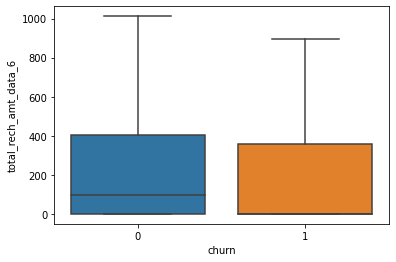

In [49]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['total_rech_amt_data_6'], showfliers = False)
plt.show()

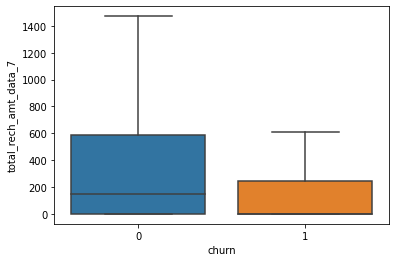

In [50]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['total_rech_amt_data_7'], showfliers = False)
plt.show()

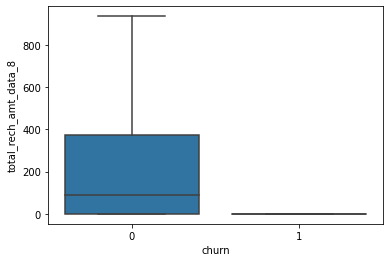

In [51]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['total_rech_amt_data_8'], showfliers = False)
plt.show()

In [52]:
### DATA RECHARGE AMOUNT SHOWS DECREASE

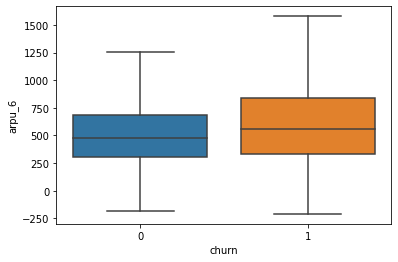

In [53]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['arpu_6'], showfliers = False)
plt.show()

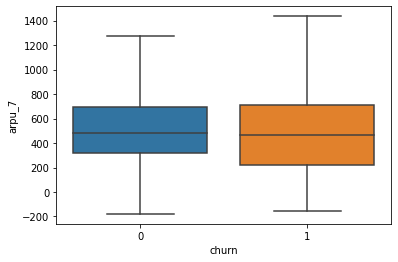

In [54]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['arpu_7'], showfliers = False)
plt.show()

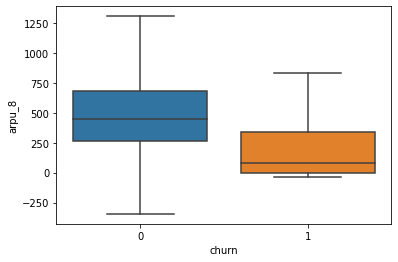

In [55]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['arpu_8'], showfliers = False)
plt.show()

In [56]:
### WE SEE ARPU DECREASE ALSO IN 8TH MONTH 

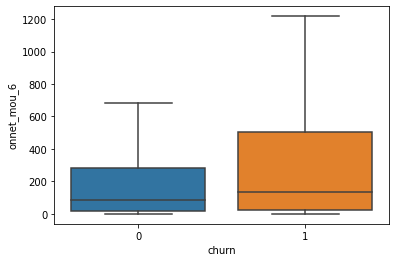

In [57]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['onnet_mou_6'], showfliers = False)
plt.show()

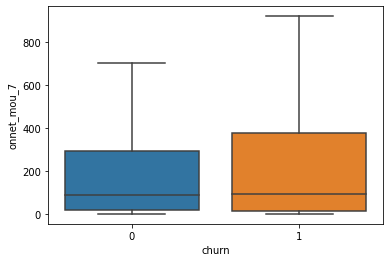

In [58]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['onnet_mou_7'], showfliers = False)
plt.show()

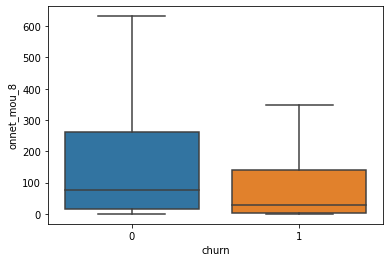

In [59]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['onnet_mou_8'], showfliers = False)
plt.show()

In [60]:
### THE ONNET MOU FOR NON CHURN CUSTOMERS INCREASED WHILE FOR CHURNED CUSTOMERS IT DECREASED

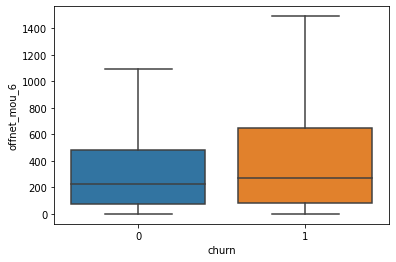

In [61]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['offnet_mou_6'], showfliers = False)
plt.show()

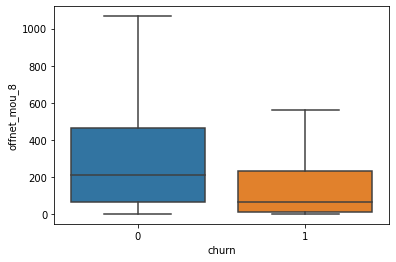

In [62]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['offnet_mou_8'], showfliers = False)
plt.show()

In [63]:
### SIMILAR TREND IN OFFNET MOU 

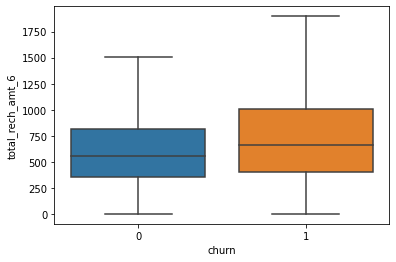

In [64]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['total_rech_amt_6'], showfliers = False)
plt.show()

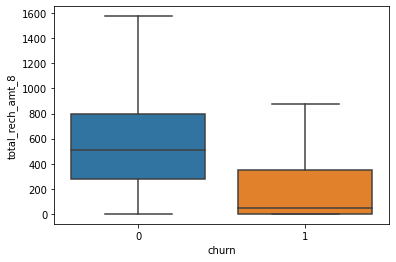

In [65]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['total_rech_amt_8'], showfliers = False)
plt.show()

In [66]:
### TOT RECH AMOUNT REMAINS SAME FOR NON CHURN AND DROPS FOR CHURN CUSTOMERS 

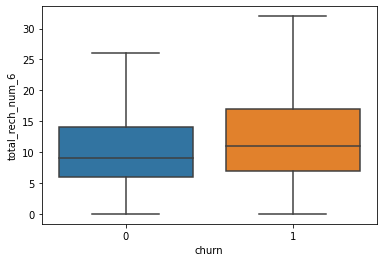

In [67]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['total_rech_num_6'], showfliers = False)
plt.show()

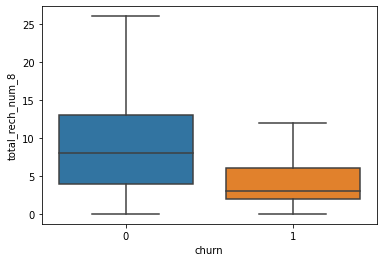

In [68]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['total_rech_num_8'], showfliers = False)
plt.show()

In [69]:
### THE TOT NUM OF RECHARGES FOR NON CHURN CUSTOMERS INCREASED WHILE FOR CHURNED CUSTOMERS IT DECREASED

In [70]:
### IMPUTING MISSING RECHARGE COLUMNS 
import re
for k,v in d.items():
    if k.find('max_rech') !=-1:
        df_high_value[k] = df_high_value[k].fillna(0, inplace= False)

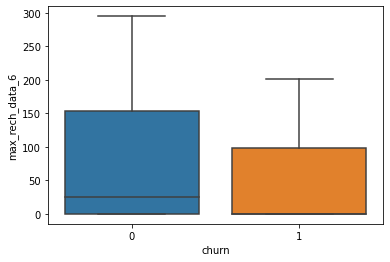

In [71]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['max_rech_data_6'], showfliers = False)
plt.show()

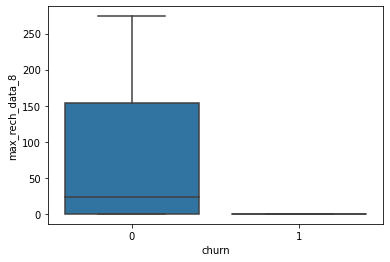

In [72]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['max_rech_data_8'], showfliers = False)
plt.show()

In [73]:
for k,v in d.items():
    if k.find('rech') !=-1:
        print(k,v)       

date_of_last_rech_6 73
date_of_last_rech_7 98
date_of_last_rech_8 582
date_of_last_rech_data_6 13213
date_of_last_rech_data_7 12915
date_of_last_rech_data_8 14018
max_rech_data_6 13213
max_rech_data_7 12915
max_rech_data_8 14018
count_rech_2g_6 13213
count_rech_2g_7 12915
count_rech_2g_8 14018
count_rech_3g_6 13213
count_rech_3g_7 12915
count_rech_3g_8 14018


In [74]:
### DROPPING COUNT RECH COLUMNS 
for k,v in d.items():
    if k.find('count') !=-1:
        df_high_value.drop(k, axis = 1, inplace= True)

In [75]:
df_high_value.columns[df_high_value.columns.str.contains('count')]

Index([], dtype='object')

In [76]:
### REMOVING 2G 3G ARPU
for k,v in d.items():
    if k.find('arpu') !=-1:
        df_high_value.drop(k, axis = 1, inplace= True)

In [77]:
df_high_value.columns[df_high_value.columns.str.contains('arpu')]

Index(['arpu_6', 'arpu_7', 'arpu_8'], dtype='object')

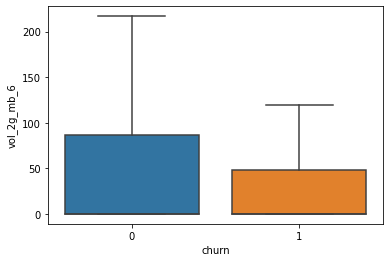

In [78]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['vol_2g_mb_6'], showfliers = False)
plt.show()

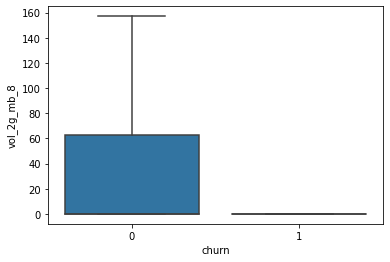

In [79]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['vol_2g_mb_8'], showfliers = False)
plt.show()

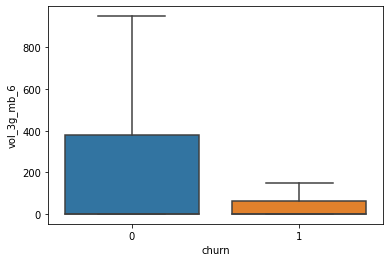

In [80]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['vol_3g_mb_6'], showfliers = False)
plt.show()

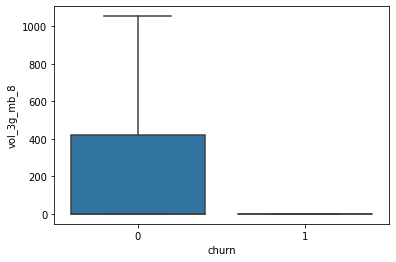

In [81]:
plt.figure(figsize =(6,4))
sn.boxplot(df_high_value['churn'], df_high_value['vol_3g_mb_8'], showfliers = False)
plt.show()

In [82]:
### VOLUME OF DATA USAGE DROPS IN MONTH 8

In [83]:
monthly = df_high_value.columns[df_high_value.columns.str.contains('monthly')].tolist()
monthly

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [84]:
def plotbar(column):
    sn.barplot(df_high_value['churn'], df_high_value[column])
    plt.show()

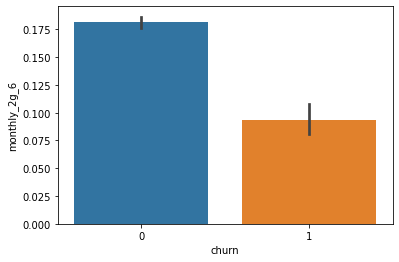

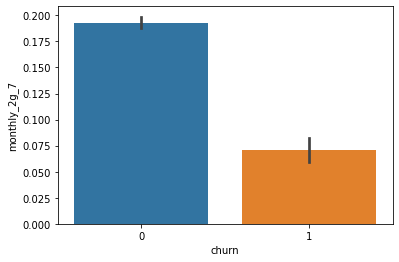

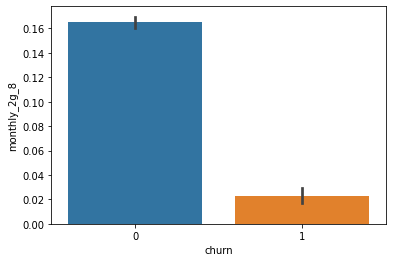

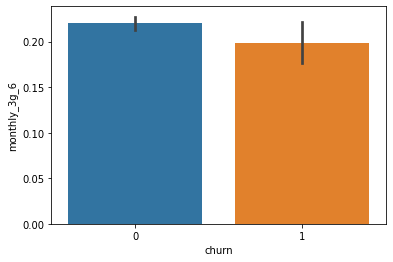

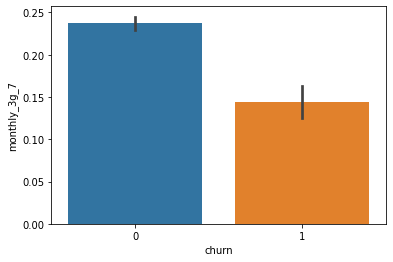

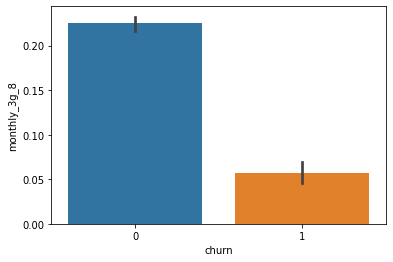

In [85]:
for col in monthly:
    plotbar(col)

In [86]:
### 8th MONTH AGAIN SHOWS DECREASE IN VALUES FOR CHURN CUSTOMERS 

In [87]:
df_high_value.columns[df_high_value.columns.str.contains('vbc')]

Index(['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object')

In [88]:
### COLUMN RENAMING 
df_high_value = df_high_value.rename(columns = {'aug_vbc_3g':'vbc_3g_8', 'jul_vbc_3g':'vbc_3g_7',
                                               'jun_vbc_3g':'vbc_3g_6', 'sep_vbc_3g':'vbc_3g_9'})

In [89]:
df_high_value.drop('vbc_3g_9',axis =1 , inplace = True)

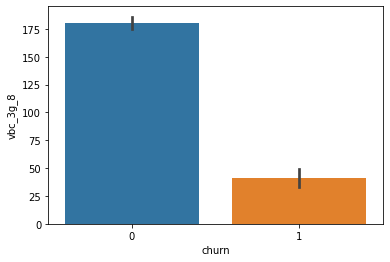

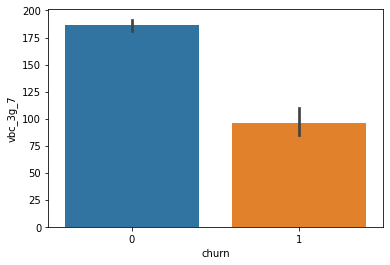

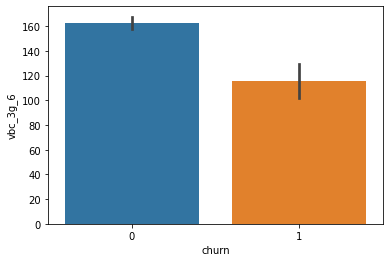

In [90]:
vbc_columns = df_high_value.columns[df_high_value.columns.str.contains('vbc')]
for col in vbc_columns:
    plotbar(col)

In [91]:
### VBC SIGNIFICANTLY DECREASES OVER MONTHS 

In [92]:
sachet_columns = df_high_value.columns[df_high_value.columns.str.contains('sachet')]
sachet_columns

Index(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

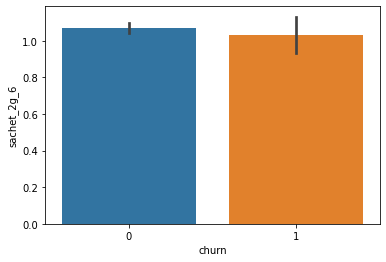

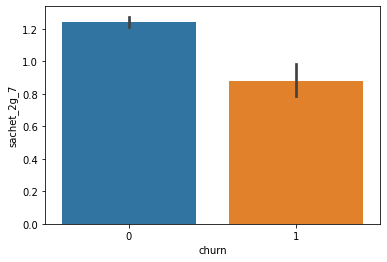

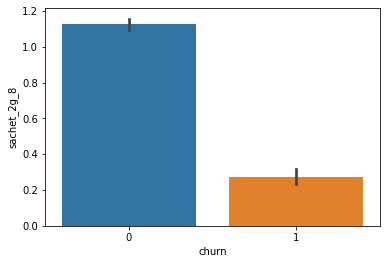

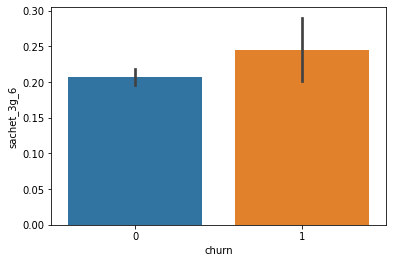

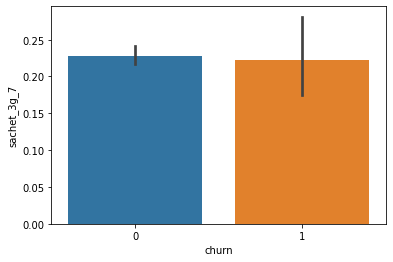

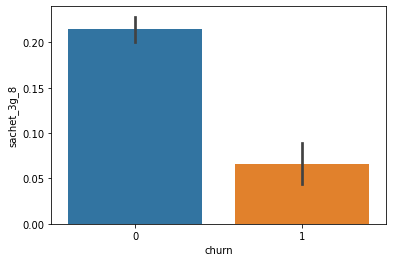

In [93]:
for col in sachet_columns:
    plotbar(col)

In [94]:
### 8TH MONTH SHOWS REDUCTION IN SACHET USAGE AS WELL

In [95]:
arpu_columns = df_high_value.columns[df_high_value.columns.str.contains('arpu')]
arpu_columns

Index(['arpu_6', 'arpu_7', 'arpu_8'], dtype='object')

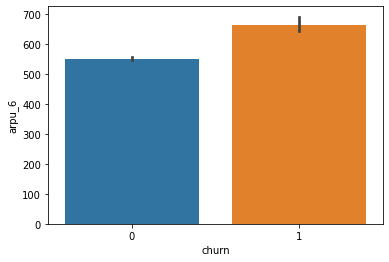

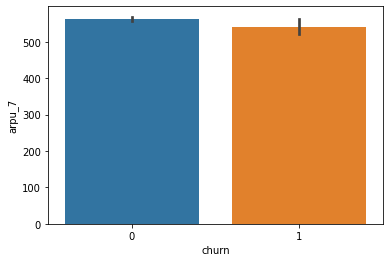

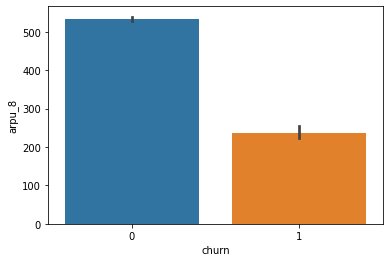

In [96]:
for col in arpu_columns:
    plotbar(col)

In [97]:
### VERY LESS ARPU FOR 8TH MONTH 

In [98]:
for k,v in d.items():
    if k.find('mou') !=-1:
        print(k,v)       

onnet_mou_6 542
onnet_mou_7 536
onnet_mou_8 1172
offnet_mou_6 542
offnet_mou_7 536
offnet_mou_8 1172
roam_ic_mou_6 542
roam_ic_mou_7 536
roam_ic_mou_8 1172
roam_og_mou_6 542
roam_og_mou_7 536
roam_og_mou_8 1172
loc_og_t2t_mou_6 542
loc_og_t2t_mou_7 536
loc_og_t2t_mou_8 1172
loc_og_t2m_mou_6 542
loc_og_t2m_mou_7 536
loc_og_t2m_mou_8 1172
loc_og_t2f_mou_6 542
loc_og_t2f_mou_7 536
loc_og_t2f_mou_8 1172
loc_og_t2c_mou_6 542
loc_og_t2c_mou_7 536
loc_og_t2c_mou_8 1172
loc_og_mou_6 542
loc_og_mou_7 536
loc_og_mou_8 1172
std_og_t2t_mou_6 542
std_og_t2t_mou_7 536
std_og_t2t_mou_8 1172
std_og_t2m_mou_6 542
std_og_t2m_mou_7 536
std_og_t2m_mou_8 1172
std_og_t2f_mou_6 542
std_og_t2f_mou_7 536
std_og_t2f_mou_8 1172
std_og_mou_6 542
std_og_mou_7 536
std_og_mou_8 1172
isd_og_mou_6 542
isd_og_mou_7 536
isd_og_mou_8 1172
spl_og_mou_6 542
spl_og_mou_7 536
spl_og_mou_8 1172
loc_ic_t2t_mou_6 542
loc_ic_t2t_mou_7 536
loc_ic_t2t_mou_8 1172
loc_ic_t2m_mou_6 542
loc_ic_t2m_mou_7 536
loc_ic_t2m_mou_8 1172
loc_i

In [99]:
for k,v in d.items():
    if k.find('mou') !=-1:
        df_high_value[k] = df_high_value[k].fillna(0, inplace= False)

In [100]:
df_high_value.columns[df_high_value.isnull().sum()>0]

Index(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

In [101]:
og_mou_6 = df_high_value.columns[df_high_value.columns.str.contains('.*_og_.*mou_6')]

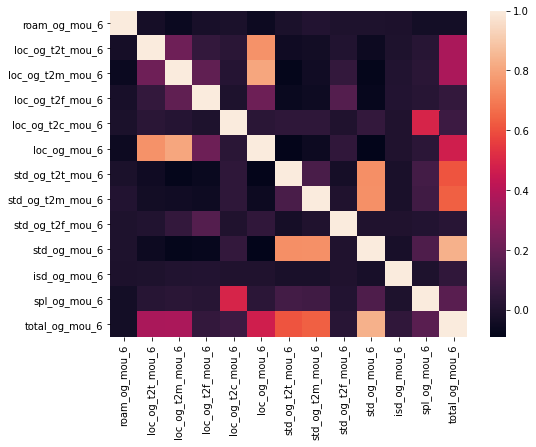

In [102]:
plt.figure(figsize=(8,6))
sn.heatmap(df_high_value.filter(og_mou_6).corr())
plt.show()

In [103]:
### STD LOC AD TOT OG MOU HAVE CORRELATION WITH OTHER VARIABLES 
col_to_drop = ['total_og_mou_6', 'std_og_mou_6', 'loc_og_mou_6',
              'total_og_mou_7', 'std_og_mou_7', 'loc_og_mou_7',
              'total_og_mou_8', 'std_og_mou_8', 'loc_og_mou_8']
for col in col_to_drop:
    df_high_value.drop(col, axis = 1, inplace = True)

In [104]:
ic_mou_6 = df_high_value.columns[df_high_value.columns.str.contains('.*_ic_.*mou_6')]

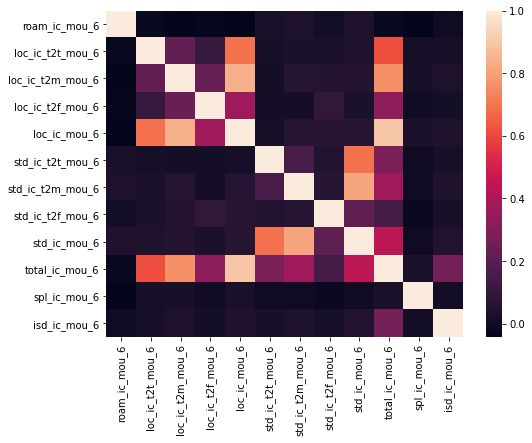

In [105]:
plt.figure(figsize=(8,6))
sn.heatmap(df_high_value.filter(ic_mou_6).corr())
plt.show()

In [106]:
### AGAIN TOT STD AND LOC IC MOU HAVE CORRELATION WITH OTHER COLUMNS 
col_to_drop = ['total_ic_mou_6', 'std_ic_mou_6', 'loc_ic_mou_6',
              'total_ic_mou_7', 'std_ic_mou_7', 'loc_ic_mou_7',
              'total_ic_mou_8', 'std_ic_mou_8', 'loc_ic_mou_8']
for col in col_to_drop:
    df_high_value.drop(col, axis = 1, inplace = True)

In [107]:
offnet_col = df_high_value.columns[df_high_value.columns.str.contains('offnet')]

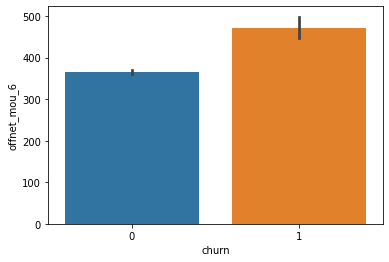

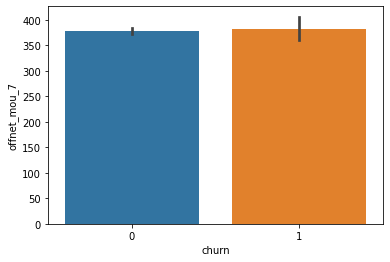

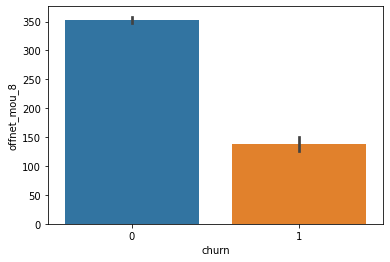

In [108]:
for col in offnet_col:
    plotbar(col)

In [109]:
onnet_col = df_high_value.columns[df_high_value.columns.str.contains('onnet')]
onnet_col

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

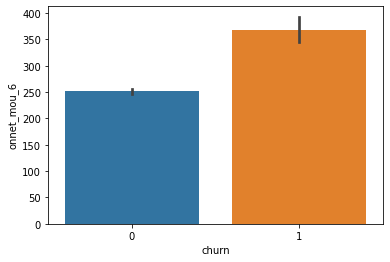

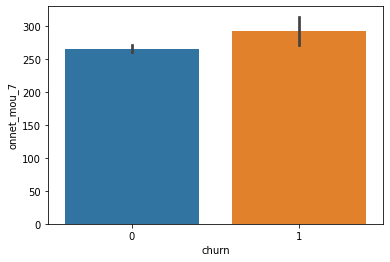

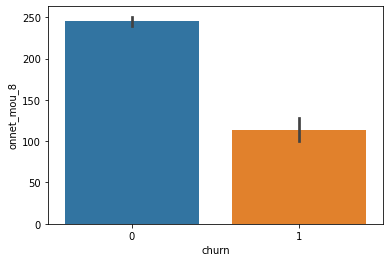

In [110]:
for col in onnet_col:
    plotbar(col)

In [111]:
df_high_value.columns[df_high_value.columns.str.contains('aon')]

Index(['aon'], dtype='object')

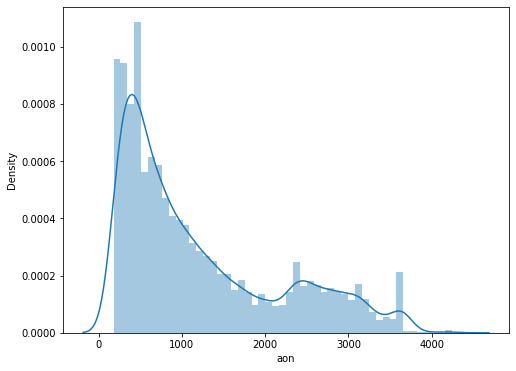

In [112]:
plt.figure(figsize=(8,6))
sn.distplot(df_high_value['aon'])
plt.show()

In [113]:
df_high_value['tenure'] = df_high_value['aon']/30

In [114]:
df_high_value['tenure_yr'] = df_high_value['tenure']/12
df_high_value['tenure_yr'] = df_high_value['tenure_yr'].apply(lambda x: int(x))
df_high_value['tenure_yr']

0        2
7        2
8        0
21       2
23       1
        ..
99981    1
99984    2
99986    7
99988    0
99997    1
Name: tenure_yr, Length: 29953, dtype: int64

In [115]:
df_aon = df_high_value.groupby(['churn','tenure_yr'])[['mobile_number']].count().unstack()
df_aon

mobile_number                                                  \
tenure_yr            0       1       2       3       4       5       6    
churn                                                                     
0                4497.0  7153.0  4168.0  2857.0  1807.0  1175.0  1700.0   
1                 619.0   801.0   449.0   189.0   108.0    52.0    54.0   

                                                    
tenure_yr      7       8      9      10    11   12  
churn                                               
0          1630.0  1414.0  557.0  536.0  25.0  1.0  
1            72.0    50.0   26.0   13.0   NaN  NaN

In [116]:
?plt.style.available()

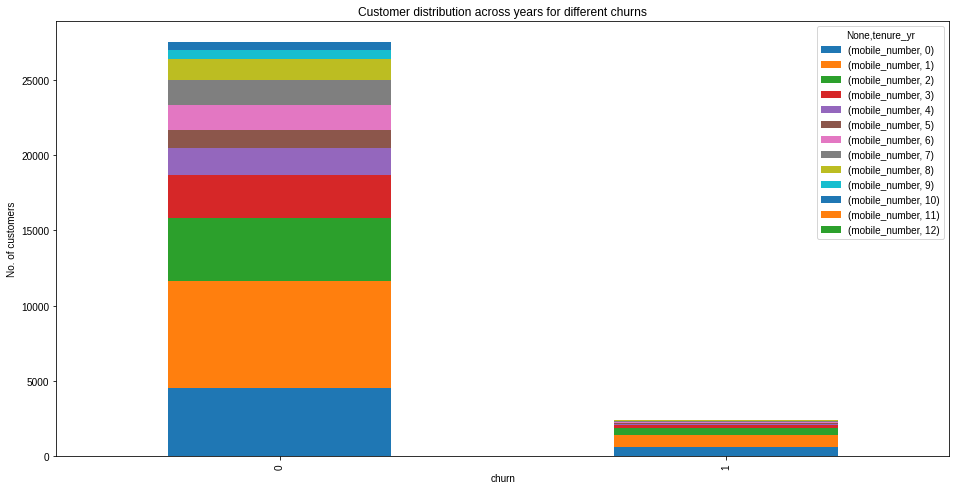

In [117]:
df_aon.plot(kind='bar',stacked='True',figsize=(16,8))
plt.title('Customer distribution across years for different churns')
plt.ylabel('No. of customers')
plt.style.use('seaborn-darkgrid')
plt.show()

In [118]:
### MAXIMUM NO. OF CUSTOMERS IN 1-3 YR RANGE

In [119]:
df_high_value.drop(['tenure','tenure_yr'],axis = 1, inplace = True)

In [120]:
df_high_value.shape

(29953, 133)

In [121]:
.3*29953

8985.9

In [122]:
columns_null = df_high_value.columns[(df_high_value.isnull().sum())>0]
d={}
for col in columns_null:
    d[col] = df_high_value[col].isnull().sum()
for k,v in d.items():
    if v>8985.9:
        df_high_value.drop(k, axis=1, inplace = True)

In [123]:
df_high_value.shape

(29953, 124)

In [124]:
for k,v in d.items():
    print(k,v)

og_others_6 542
og_others_7 536
og_others_8 1172
ic_others_6 542
ic_others_7 536
ic_others_8 1172
date_of_last_rech_6 73
date_of_last_rech_7 98
date_of_last_rech_8 582
date_of_last_rech_data_6 13213
date_of_last_rech_data_7 12915
date_of_last_rech_data_8 14018
night_pck_user_6 13213
night_pck_user_7 12915
night_pck_user_8 14018
fb_user_6 13213
fb_user_7 12915
fb_user_8 14018


In [125]:
for k,v in d.items():
    if k.find('others')!=-1:
        df_high_value[k] = df_high_value[k].fillna(0,inplace = False)

In [126]:
### ONLY DATE COLUMNS REMAIN
df_high_value.columns[(df_high_value.isnull().sum())>0]

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [127]:
df_high_value.shape

(29953, 124)

In [128]:
df_final = df_high_value.copy()
print(df_final.shape)
df_final.head(3)

(29953, 124)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rchg_amount_6_7,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,354.0,207.0,696.0,0


In [129]:
df_final.drop(["total_avg_rchg_amount_6_7"],axis=1,inplace=True)
df_final.drop(df_high_value.filter(regex='date_').columns,axis=1,inplace=True)
print (df_final.shape)

col_list = df_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_final[avg_col_name] = (df_final[col_6]  + df_final[col_7])/ 2

(29953, 120)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data


In [130]:
col_list_to_drop = df_final.filter(regex='_6|_7')
df_final.drop(col_list_to_drop,axis=1,inplace=True)
print(df_final.shape)

(29953, 81)


### PCA : Principal Component Analysis

In [131]:
telecom_df_pca = df_final.copy()

In [132]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA


In [133]:
Y = telecom_df_pca["churn"]
X = telecom_df_pca.drop(["churn","mobile_number"],axis=1)


In [134]:
X.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.16,4.13,1.15,0.00,0.00,0.00,0.0,0.00,0.00,2,252,252,252,1.0,252.0,252.0,5.75,109.61,0,0,1,0,968,30.40,252.0,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,307.0,252.0,252.0,1.0,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600,252.0
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.0,27.31,121.19,39.53,30.39,141.33,22.21,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.00,0.00,0,0,0,0,802,57.74,0.0,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,13.795,40.825,13.37,0.090,2.25,0.0,45.200,219.525,126.810,24.360,109.215,43.215,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060,0.0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.0,0.31,15.48,0.00,0.10,0.65,0.00,0.0,0.00,0.00,14,120,30,10,3.0,23.0,69.0,0.03,11.94,0,3,0,0,315,21.03,207.0,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,124.995,11.865,0.00,0.000,0.00,0.0,16.840,35.780,0.000,0.290,13.255,0.000,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,77.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,516.405,177.0
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,61.79,876.99,0.00,0.00,0.00,0.0,19.54,129.16,10.39,0.18,101.74,0.00,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.0,0.00,0.00,0,0,0,0,720,0.00,0.0,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,111.935,737.050,0.00,0.000,0.00,0.0,6.335,96.430,3.725,10.020,52.960,0.000,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,0.00,39.61,0.00,0.00,17.71,0.0,76.64,146.84,0.71,13.38,43.91,0.00,0.0,3.74,13.06,4,439,179,0,2.0,179.0,270.0,0.01,1009.92,0,0,1,1,604,40.45,540.0,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,0.000,4.355,0.00,0.005,0.05,0.0,40.875,104.635,0.000,0.255,8.660,0.000,0.000,14.115,2.675,4.0,227.0,89.5,89.5,1.0,89.5,178.0,0.240,299.545,0.0,0.0,1.0,0.0,25.930,356.0


In [135]:
Y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

### Percentage distribution of churn/non-churn cutomer data

In [136]:
print("Percenatge of Churned Customer data : "+str(round(100*Y.sum()/len(Y),2)))

Percenatge of Churned Customer data : 8.12


### Scale the data

In [137]:
scaler = StandardScaler()
X_col = X.columns
X_scaled = scaler.fit_transform(X)
X_after_scale = pd.DataFrame(X_scaled, columns=X_col)

X_after_scale.head(5)

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,-0.587674,-0.510841,-0.695309,-0.168679,-0.189787,-0.343476,-0.649478,-0.301900,-0.238110,-0.373493,-0.384626,-0.145041,-0.043625,-0.322777,-0.01739,-0.393039,-0.661296,-0.306103,-0.194993,-0.270094,-0.128812,-0.239999,-0.155900,-0.095845,-0.859812,-0.544124,0.529591,1.098537,-0.207844,1.622450,0.663408,-0.319829,-0.263422,-0.377738,-0.416099,1.276531,-0.183926,-0.252008,-0.329779,-0.130336,-0.822740,-0.601302,-0.821237,-0.217580,-0.250490,-0.382885,-0.702523,-0.304606,-0.26747,-0.440961,-0.466159,-0.157504,-0.047861,-0.373455,-0.142827,-0.420301,-0.729516,-0.353064,-0.201905,-0.319361,-0.153462,-0.268081,-0.154826,-0.096699,-0.959891,-0.686829,0.526201,1.304802,-0.281673,1.675546,0.640631,-0.367143,-0.286068,-0.461204,-0.472415,1.358301,-0.230564,-0.301013,-0.194187
1,5.302613,-0.396856,-0.019115,0.257863,0.173388,-0.166450,0.044793,2.425615,-0.238110,-0.343304,-0.264487,1.379645,0.180077,-0.002416,-0.01739,-0.222309,-0.116813,0.579561,0.230718,1.097095,0.986581,-0.239999,0.291204,1.087598,-0.320785,4.993406,8.192812,4.726892,-0.541457,-0.655815,-0.624657,-0.338197,-0.382626,-0.377738,-0.416099,-0.341921,-0.183926,-0.425388,-0.264857,-0.285526,1.510046,-0.473392,0.293269,0.158438,-0.055836,-0.196834,0.924680,2.491601,-0.26747,-0.405208,-0.362562,1.001249,-0.045850,-0.243500,-0.142827,-0.132885,0.330406,2.504287,0.122424,0.842484,2.257838,0.428547,-0.041645,1.028963,-0.786191,1.016523,6.573427,-0.867797,-0.650953,-0.765285,-0.743309,-0.419584,-0.425468,-0.461204,-0.472415,-0.391449,-0.230564,-0.381270,-0.397513
2,-0.739908,-0.434372,-0.412142,-0.168679,-0.189787,-0.288584,-0.433257,-0.301900,0.762241,-0.316735,-0.199578,-0.145041,-0.043625,0.181421,-0.01739,-0.392096,-0.608504,-0.332641,-0.193592,-0.263806,-0.128812,-0.239999,-0.155900,-0.095845,0.433852,-0.760000,-0.751459,-0.567614,0.459382,-0.447878,-0.271972,-0.338101,-0.369641,-0.377738,0.766276,-0.341921,-0.183926,-0.934039,-0.352029,-0.158048,-0.289486,0.268015,-0.629816,-0.217580,-0.250490,0.774107,-0.376355,-0.304606,-0.26747,-0.117001,-0.436051,-0.157504,-0.047861,-0.373455,-0.142827,-0.313219,-0.556761,-0.353064,-0.198044,-0.178353,-0.153462,-0.268081,-0.154826,-0.096699,0.950807,-0.275541,-0.316392,-0.652262,-0.281673,-0.019475,-0.257283,0.174018,0.021262,0.828299,-0.265486,-0.391449,-0.230564,0.884275,-0.254701
3,0.256647,-0.325248,1.345016,-0.168679,-0.189787,-0.240899,-0.201077,-0.220941,-0.238110,-0.218176,1.759453,-0.145041,-0.043625,-0.322777,-0.01739,-0.271170,-0.079742,-0.092879,-0.192471,0.714112,-0.128812,-0.239999,-0.155900,-0.095845,1.

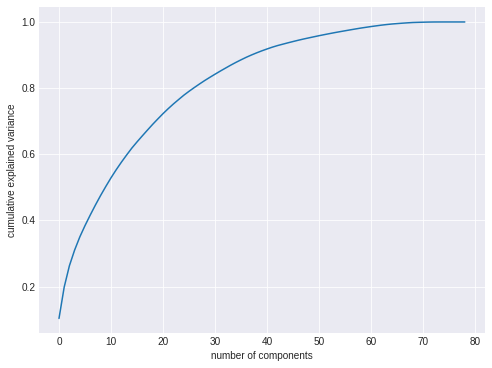

In [138]:
# Apply PCA and plot the screeplot

pca = PCA(svd_solver='randomized', random_state=101)
pca.fit(X_after_scale)
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [139]:
col = list(X_after_scale.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.000556,0.294716,0.154905,arpu_8
1,-0.112810,0.114988,0.149637,onnet_mou_8
2,-0.104630,0.199573,0.114285,offnet_mou_8
3,-0.007768,0.050446,0.007028,roam_ic_mou_8
4,-0.022813,0.069574,0.029853,roam_og_mou_8
5,-0.030653,0.098338,0.024347,loc_og_t2t_mou_8
6,-0.031542,0.176698,-0.027159,loc_og_t2m_mou_8
7,0.009128,0.109241,-0.091910,loc_og_t2f_mou_8
8,-0.014519,0.015865,0.079296,loc_og_t2c_mou_8
9,-0.109851,0.069713,0.155442,std_og_t2t_mou_8


We can see in the scree plot that the 60 components will provide 95% of expained variance. Hence we will use 60 components.

In [141]:
# Train- Test Split 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_after_scale, Y, test_size=0.3, train_size=0.7, random_state=1)

As we have seen that the count of churned customers is very less and data is imbalanced. We need to balance the data using balancing techniques. We are using SMOTE to balance the data.

In [142]:
smote = SMOTE(kind = "regular")
x_train_smt,y_train_smt = smote.fit_sample(x_train,y_train)

#Lets chech the shape of training set after SMOTE
x_train_smt.shape


(38528, 79)

In [143]:
# Applying PCA : Pricnipal Component Analysis
pca = IncrementalPCA(n_components=60)    
x_train_pca = pca.fit_transform(x_train_smt)
x_test_pca = pca.transform(x_test)

In [144]:
x_train = x_train_pca
y_train = y_train_smt
x_test = x_test_pca

In [145]:
x_train.shape

(38528, 60)

We have got balanced data set after SMOTE

### Logistic Regression

In [146]:
from sklearn.preprocessing import scale
from sklearn import svm
from sklearn import metrics
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix


In [147]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
model = lr.fit(x_train,y_train)
#Making prediction on the test data
pred_probs_test = model.predict_proba(x_test)[:,1]
print("Logistic Regression Accurancy : "+"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

Logistic Regression Accurancy : 0.89


### Using Tree Models 

Using Random Forest with default parameters 

In [169]:
x_train.shape

(38528, 60)

In [170]:
y_train.shape

(38528,)

In [171]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [172]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [173]:
# Making predictions
y_test_pred = rfc.predict(x_test)


In [174]:
#Get the summary 
confusion = metrics.confusion_matrix(y_test, y_test_pred )
confusion


array([[7786,  470],
       [ 334,  396]])

In [175]:
accuracy = round(accuracy_score(y_test,y_test_pred),2)
recall = round(recall_score(y_test,y_test_pred),2)
precision = round(precision_score(y_test,y_test_pred),2)
auc = round(roc_auc_score(y_test,y_test_pred),2)
f1 = round(f1_score(y_test,y_test_pred),2)
data = [["Random Forest(Default)",accuracy,recall,precision,auc,f1]] 
df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','AUC','F1'])

df

,Model,Accuracy,Precision,Recall,AUC,F1
0,Random Forest(Default),0.91,0.54,0.46,0.74,0.5


Hyper parameter tuning using RandomizedSearchCV

In [176]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
n_estimators = [200]
max_features = ['auto', 'sqrt']
max_depth = [12,18]
max_depth.append(None)
min_samples_split = [10,20,30]
min_samples_leaf = [10, 20]

bootstrap= [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap
               }

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter=5, cv =2, verbose =2, random_state=100)

rf_random.fit(x_train, y_train)

print(rf_random.best_params_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] n_estimators=200, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=18, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=18, bootstrap=False, total=  57.3s
[CV] n_estimators=200, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=18, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.3s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=18, bootstrap=False, total=  56.3s
[CV] n_estimators=200, min_samples_split=30, min_samples_leaf=20, max_features=sqrt, max_depth=12, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=30, min_samples_leaf=20, max_features=sqrt, max_depth=12, bootstrap=True, total=  28.8s
[CV] n_estimators=200, min_samples_split=30, min_samples_leaf=20, max_features=sqrt, max_depth=12, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=30, min_samples_leaf=20, max_features=sqrt, max_depth=12, bootstrap=True, total=  28.7s
[CV] n_estimators=200, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=True, total=  36.7s
[CV] n_estimators=200, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estim

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.4min finished


{'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 18, 'bootstrap': False}


Now fit the model with tunned parameters 

In [177]:
clf = RandomForestClassifier(**rf_random.best_params_)

clf.fit(x_train, y_train)

# Making predictions
y_test_pred = clf.predict(x_test)

In [178]:
#Get the summary 
confusion = metrics.confusion_matrix(y_test, y_test_pred )
confusion


array([[7687,  569],
       [ 291,  439]])

In [180]:
accuracy = round(accuracy_score(y_test,y_test_pred),2)
recall = round(recall_score(y_test,y_test_pred),2)
precision = round(precision_score(y_test,y_test_pred),2)
auc = round(roc_auc_score(y_test,y_test_pred),2)
f1 = round(f1_score(y_test,y_test_pred),2)
data = [["Random Forest(Tunned)",accuracy,recall,precision,auc,f1]] 
df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','AUC','F1'])

df

,Model,Accuracy,Precision,Recall,AUC,F1
0,Random Forest(Tunned),0.9,0.6,0.44,0.77,0.51


### XGBOOST

Let's finally try XGBoost 

In [181]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE

In [182]:
#Check if data set is intact. 
x_train.shape

(38528, 60)

In [183]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [184]:
# evaluate predictions
y_test_pred = model.predict(x_test)

In [185]:
#Get the summary 
confusion = metrics.confusion_matrix(y_test, y_test_pred )
confusion


array([[7076, 1180],
       [ 171,  559]])

In [186]:
accuracy = round(accuracy_score(y_test,y_test_pred),2)
recall = round(recall_score(y_test,y_test_pred),2)
precision = round(precision_score(y_test,y_test_pred),2)
auc = round(roc_auc_score(y_test,y_test_pred),2)
f1 = round(f1_score(y_test,y_test_pred),2)
data = [["XGBoost(Default)",accuracy,recall,precision,auc,f1]] 
df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','AUC','F1'])

df

,Model,Accuracy,Precision,Recall,AUC,F1
0,XGBoost(Default),0.85,0.77,0.32,0.81,0.45


In [187]:
# Lets tune the hyperparameters

# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)    


In [188]:
# fit the model
model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'subsample': [0.3, 0.4, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_s

In [189]:
# cv results
cv_results_xboost = pd.DataFrame(model_cv.cv_results_)
cv_results_xboost['param_learning_rate'] = cv_results_xboost['param_learning_rate'].astype('float')

In [190]:
# Accuracy 

print('The accuracy after hyperparamter tunning **'+str(round(model_cv.best_score_,2))+'** using '+str(model_cv.best_params_))

The accuracy after hyperparamter tunning **0.88** using {'learning_rate': 0.3, 'subsample': 0.5}


In [191]:
def plot_for_xboost(param_grid,cv_results):
    plt.figure(figsize=(18,5))
    for n, subsample in enumerate(param_grid['subsample']):
        # subplot 1/n
        plt.subplot(1,len(param_grid['subsample']), n+1)
        df = cv_results[cv_results['param_subsample']==subsample]

        plt.plot(df["param_learning_rate"], df["mean_test_score"])
        plt.plot(df["param_learning_rate"], df["mean_train_score"])
        plt.xlabel('learning_rate')
        plt.ylabel('AUC')
        plt.title("subsample={0}".format(subsample))
        plt.ylim([0.60, 1])
        plt.legend(['test score', 'train score'], loc='right left')
        plt.xscale('log')

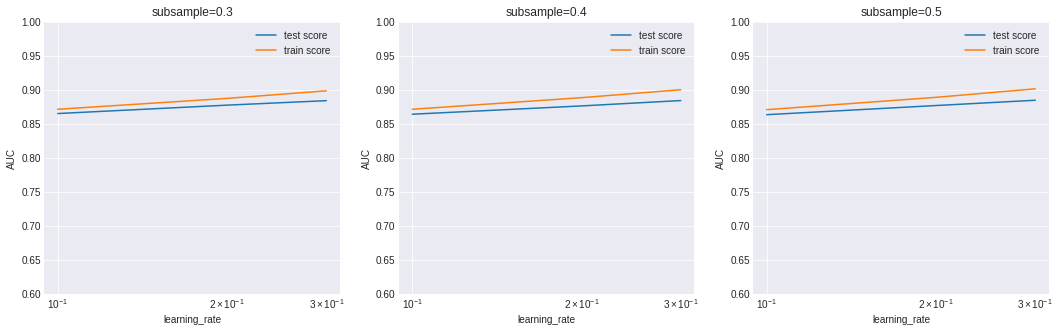

In [192]:
param_grid1 = {'learning_rate': [0.1,0.2,0.3], 'subsample': [0.3,0.4,0.5]}  
plot_for_xboost(param_grid1,cv_results_xboost)

The results shows that the sub sample 0.5 and learning rate .3 is optimium.

In [194]:
params = {'learning_rate': 0.3,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.5,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params,max_depth=2, n_estimators=200)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.5},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [196]:
# predict
y_test_pred = model.predict(x_test)

In [197]:
#Get the summary 
confusion = metrics.confusion_matrix(y_test, y_test_pred )
confusion

array([[7044, 1212],
       [ 175,  555]])

In [199]:
accuracy = round(accuracy_score(y_test,y_test_pred),2)
recall = round(recall_score(y_test,y_test_pred),2)
precision = round(precision_score(y_test,y_test_pred),2)
auc = round(roc_auc_score(y_test,y_test_pred),2)
f1 = round(f1_score(y_test,y_test_pred),2)
data = [["XGBoost(tunned)",accuracy,recall,precision,auc,f1]] 
df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','AUC','F1'])

df

,Model,Accuracy,Precision,Recall,AUC,F1
0,XGBoost(tunned),0.85,0.76,0.31,0.81,0.44


### Important features ...

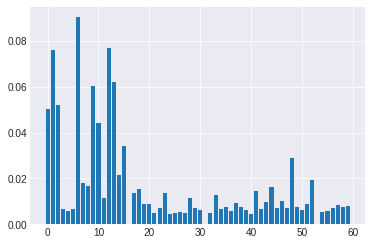

In [201]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [202]:
#Top 15 features are having high importance
col = list(X_after_scale.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(15)

,PC1,PC2,PC3,Feature
0,0.292495,0.025014,-0.095534,arpu_8
1,0.120938,-0.086469,-0.099205,onnet_mou_8
2,0.189409,-0.064994,-0.123546,offnet_mou_8
3,0.147558,-0.069671,0.353416,roam_ic_mou_8
4,0.205558,-0.086582,0.349079,roam_og_mou_8
5,0.076064,0.001001,-0.082269,loc_og_t2t_mou_8
6,0.143748,0.023615,-0.130816,loc_og_t2m_mou_8
7,0.081554,0.032649,-0.045311,loc_og_t2f_mou_8
8,0.029435,-0.011421,-0.052527,loc_og_t2c_mou_8
9,0.073058,-0.091261,-0.104763,std_og_t2t_mou_8


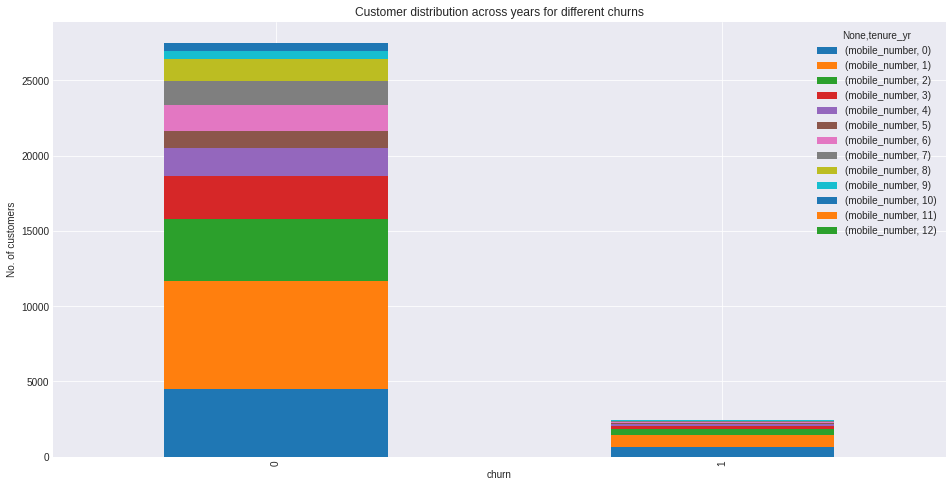

In [203]:
df_aon.plot(kind='bar',stacked='True',figsize=(16,8))
plt.title('Customer distribution across years for different churns')
plt.ylabel('No. of customers')
plt.style.use('seaborn-darkgrid')
plt.show()

**Recommendations to Business**

1. The customers who have tenure of less than 3-4 years are more likely to churn. Company should provide some schemes to retain the recently joined customers.

3. The churn prediction is highly depends on Average Revenue Per User. Company should check with customer for his/her problems.

4. The churn behaviour is indecated by Incoming Outgoing and Roaming for the 8th Months. Compoany should relook the policy of roaming call charges.

5. Local Outgoing calls made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.

6. The customers who are struggling with 2G/3G coverage are more likely to churn. Company should consider checking the network coverage of respective customers.